Import

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def find_data(path : str) -> list:

    files = os.listdir(path)
    data = [None for _ in range(len(files))]

    with tqdm(total=len(files)) as pbar:
        for file in files:
            file_path = os.path.join(path, file)
            name, entention = os.path.splitext(file)
            data[int(name)-1] = np.array(pd.read_excel(file_path).values)
            pbar.update(1)
    
    return data

Input Data

In [6]:
data = find_data('/home/corn/Documents/ScienceFair/Data/Data_2/Cubic/4')
name = '/home/corn/Documents/ScienceFair/Test2/Output/PreSlope(Cubic-4).png'

100%|██████████| 104/104 [00:09<00:00, 11.25it/s]


In [7]:
x = round(data[-1][np.argmax(data[-1][:, 4])][5] + 1)

maxarg = np.argmin([np.average(data[i][:,5]) for i in range(len(data))])

area = 200

Draw

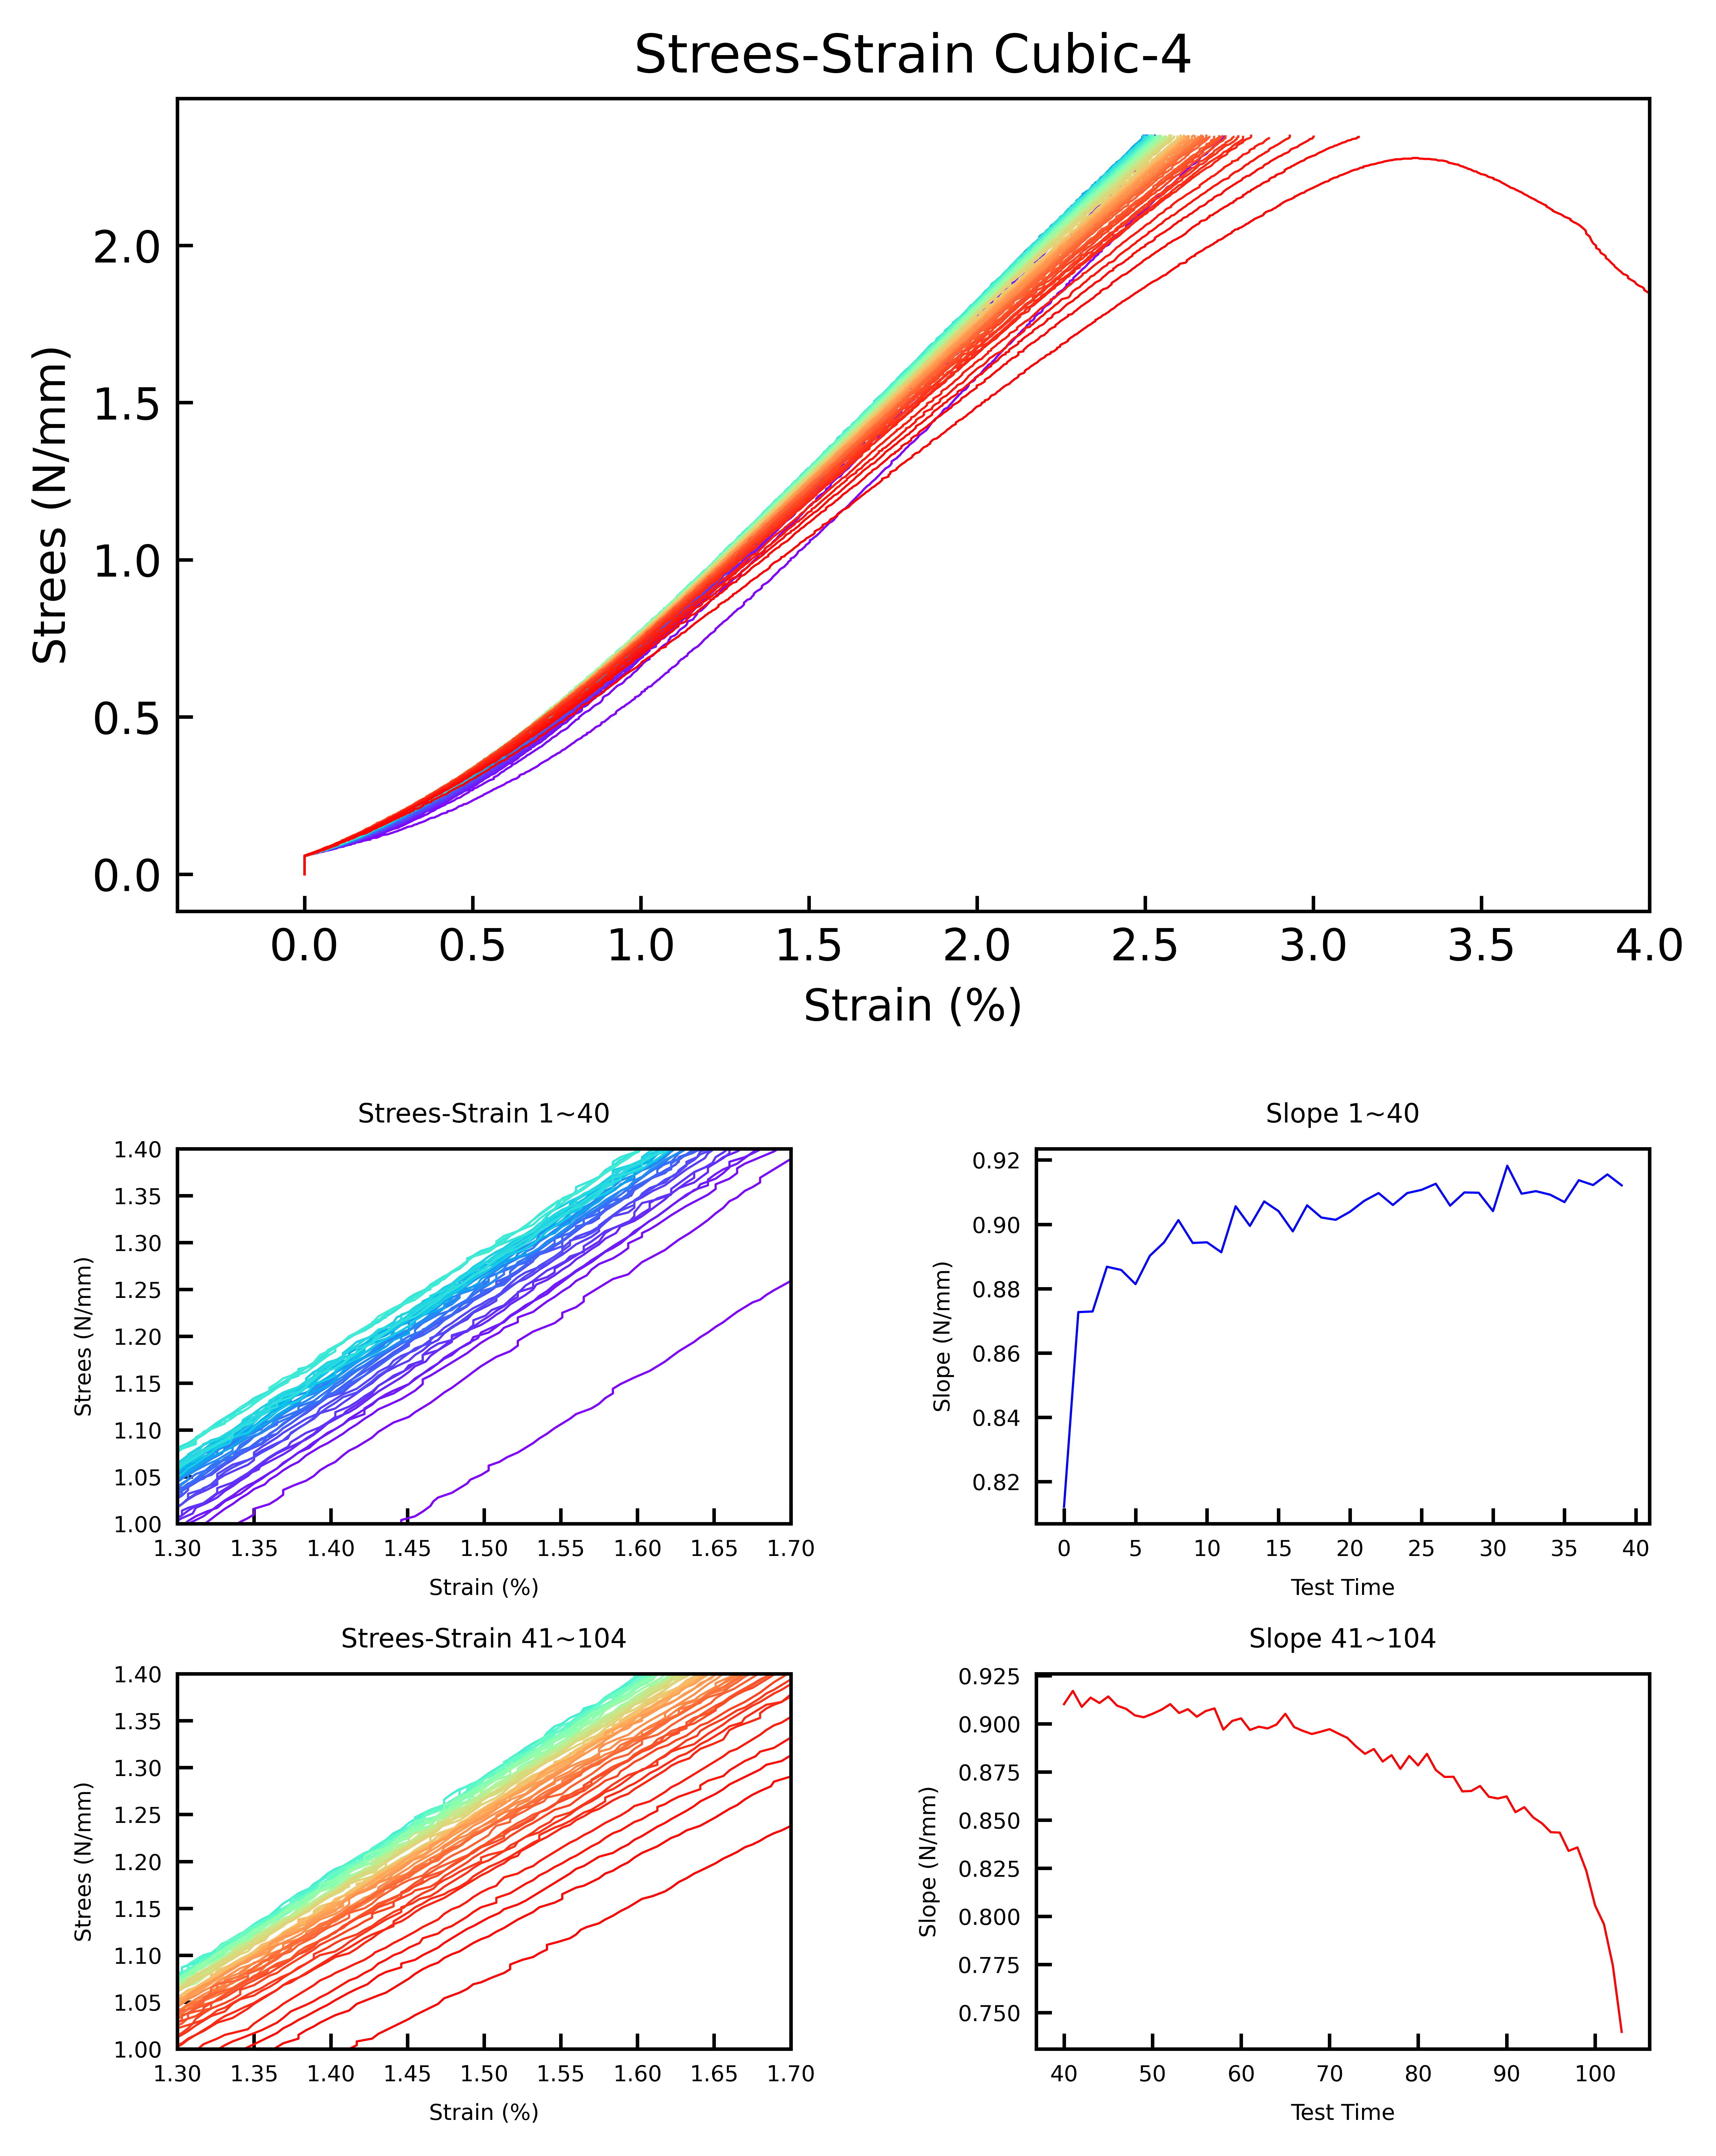

In [8]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(6, 8), dpi=1000)
colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

plt.subplot(2,1,1)

for i in range(len(data)):
    plt.plot(data[i][:,5], data[i][:,4], label=i, color=colors[i], linewidth=0.5) # 1:mm 4:應力 5:應變

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm)")
plt.xlim(xmax=x)
plt.title("Strees-Strain Cubic-4")

plt.rcParams.update({'font.size': 5})

plt.subplot(4,2,5)

for i in range(maxarg):
    plt.plot(data[i][:,5], data[i][:,4], label=i, color=colors[i], linewidth=0.5) # 1:mm 4:應力 5:應變

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm)")
plt.ylim(1, 1.4)
plt.xlim(1.3, 1.7)
plt.title("Strees-Strain 1~40")

plt.subplot(4,2,6)

slope = [None for _ in range(maxarg)]

for i in range(maxarg):

    top_index = np.argmax(data[i][:,4])+1 # +1是為了他自己也要進去
    strees = [data[i][j][4] for j in range(top_index) if data[i][j][4] != 0]
    strain = [data[i][j][5] for j in range(top_index) if data[i][j][4] != 0]

    max_slope = []

    for j in range(len(strees) - area):

        current_slope = np.polyfit(strain[j:j+area], strees[j:j+area], 1)[0]
        max_slope.append(current_slope)

    slope[i] = round(np.average(max_slope), 4)

plt.plot([i for i in range(len(slope))], slope, color="blue", linewidth=0.5) # 1:mm 4:應力 5:應變

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xlabel("Test Time")
plt.ylabel("Slope (N/mm)")
plt.title("Slope 1~40")

plt.subplot(4,2,7)

for i in range(maxarg, len(data)):
    plt.plot(data[i][:,5], data[i][:,4], label=i, color=colors[i], linewidth=0.5) # 1:mm 4:應力 5:應變

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm)")
plt.ylim(1, 1.4)
plt.xlim(1.3, 1.7)
plt.title("Strees-Strain 41~104")

plt.subplot(4,2,8)

slope = [None for _ in range(maxarg, len(data))]

for i in range(maxarg, len(data)):

    top_index = np.argmax(data[i][:,4])+1 # +1是為了他自己也要進去
    strees = [data[i][j][4] for j in range(top_index) if data[i][j][4] != 0]
    strain = [data[i][j][5] for j in range(top_index) if data[i][j][4] != 0]

    max_slope = []

    for j in range(len(strees) - area):

        current_slope = np.polyfit(strain[j:j+area], strees[j:j+area], 1)[0]
        max_slope.append(current_slope)

    slope[i-maxarg] = round(np.average(max_slope), 4)

plt.plot([i+maxarg for i in range(len(slope))], slope, color="red", linewidth=0.5) # 1:mm 4:應力 5:應變

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xlabel("Test Time")
plt.ylabel("Slope (N/mm)")
plt.title("Slope 41~104")

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig(name, bbox_inches='tight')

plt.show()